In [96]:
import pandas as pd
import os
import school_analysis as sa

path=os.path.join(sa.PROJECT_PATH, "data", "genesis","number_of_repeaters.csv")
df = pd.read_csv(os.path.join(sa.PROJECT_PATH ,path), sep=";", skiprows=5, skipfooter=4, engine="python")

df.replace("b'", "", inplace=True, regex=True)
years = [item for item in df.iloc[1].dropna().tolist() if item!='' and item!='\'']

data = []

for idx, year in enumerate(years):
    repeaters = df.iloc[169:, 1 + 3 * (idx + 1)].dropna().tolist()[:-2]
    classes = df.iloc[169:, 1].dropna().tolist()[:-2]
    
    if len(repeaters) != len(classes):
        raise ValueError("Die Längen von 'repeaters' und 'classes' stimmen nicht überein.")

    for cl, rp in zip(classes, repeaters):
        data.append({'class': cl, 'repeaters': rp, 'year': year})


df_melted = pd.DataFrame(data)


df_melted

                                 class repeaters     year
0                              Grade 1     16904  1998/99
1                              Grade 2     21824  1998/99
2                              Grade 3     15237  1998/99
3                              Grade 4     11028  1998/99
4                              Grade 5     17332  1998/99
..                                 ...       ...      ...
320                            Grade 9    31181'  2022/23
321                           Grade 10    13327'  2022/23
322    Grade 11 / Introductory phase E     9194'  2022/23
323  Grade 12 / Qualification phase Q1     8787'  2022/23
324  Grade 13 / Qualification phase Q2     3823'  2022/23

[325 rows x 3 columns]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

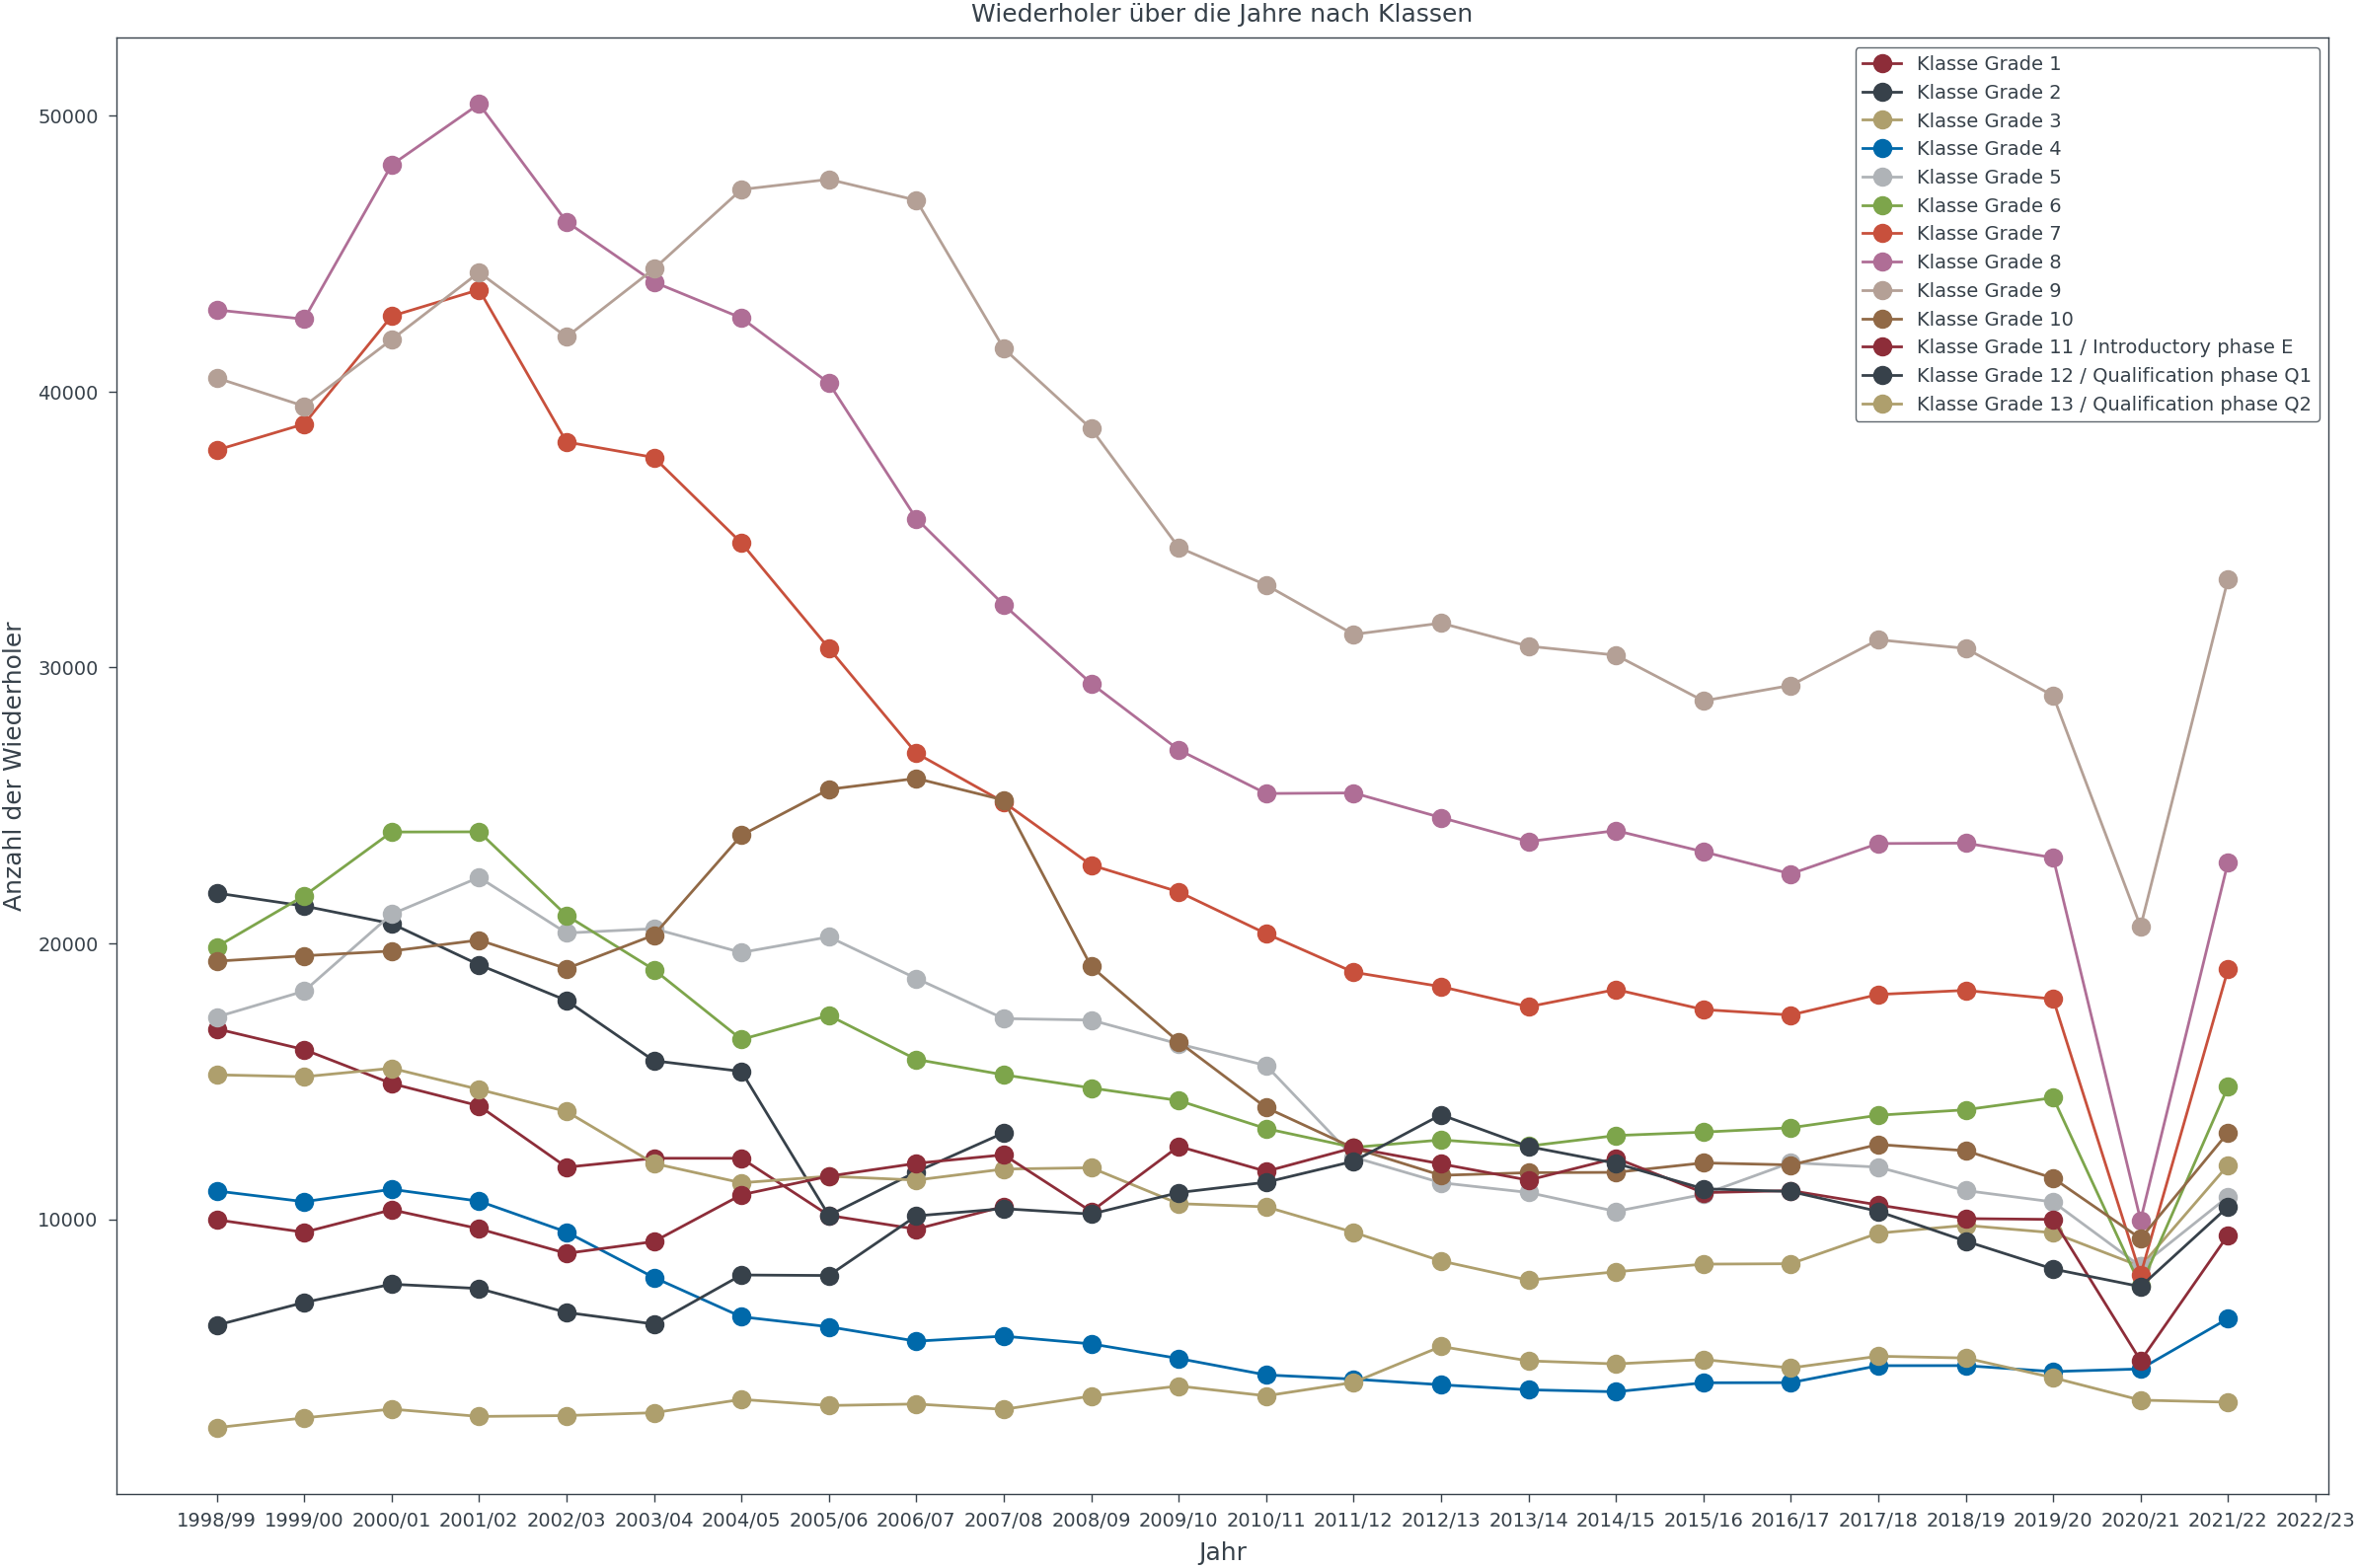

In [105]:
import matplotlib.pyplot as plt

df_melted['repeaters'] = pd.to_numeric(df_melted['repeaters'], errors='coerce')

# Eindeutige Klassen aus dem DataFrame extrahieren
unique_classes = df_melted['class'].unique()

# Erstellen eines Plots
plt.figure(figsize=(12, 8))

# Jede Klasse in derselben Grafik plotten
for cl in unique_classes:
    # Daten für die aktuelle Klasse filtern
    df_class = df_melted[df_melted['class'] == cl]

    # Linie für die aktuelle Klasse plotten
    plt.plot(df_class['year'], df_class['repeaters'], marker='o', label=f'Klasse {cl}')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Wiederholer über die Jahre nach Klassen')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Wiederholer')

# Legende hinzufügen
plt.legend()

# Zeige den Plot
plt.show()
